# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
print('shape X_train,y_train = ',X_train.shape,y_train.shape)
print('shape X_test,y_test = ',X_test.shape,y_test.shape)
print('dtype of X_train,y_train = ',X_train.dtype,y_train.dtype)

shape X_train,y_train =  (39209, 32, 32, 3) (39209,)
shape X_test,y_test =  (12630, 32, 32, 3) (12630,)
dtype of X_train,y_train =  uint8 uint8


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np
# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
#sign_classes, class_indices, class_counts = np.unique(y_train, return_index = True, return_counts = True)
n_classes = len(np.unique(y_train))


print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

** DATA VISUALIZATION ** The last two plots show that there is a  highly variable number of training examples for each class. Therefore we would expect that we might expect to do poorly on the classes that are under represented. So that means that data augmentation might improve accuracy. We will need to examine the distribution of errors to see for sure if the under represented classes are causing large error or not. The pictures seem to have very little rotation or angle changes in them as well. The data also helps to explain why grayscale worked better in the published paper by Lecun. The color seems poor in these images. So plan will be to use grayscale and then experiment with some types of data augmentation to improve results if needed. The last two plots can be compared to make sure that the distribution of classes is the same for training and test data, which it is. 

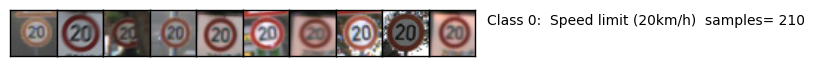

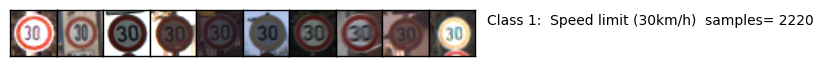

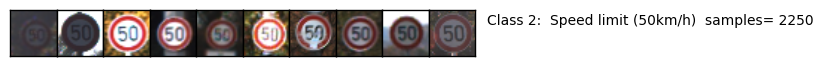

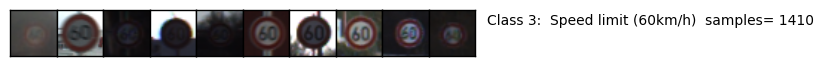

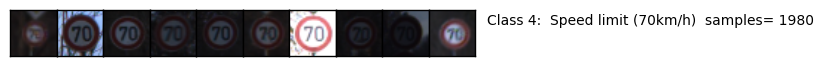

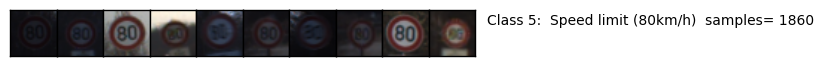

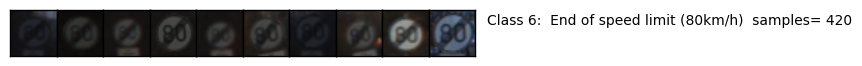

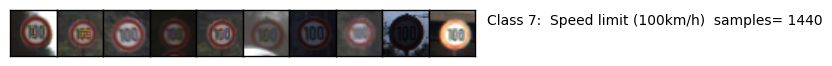

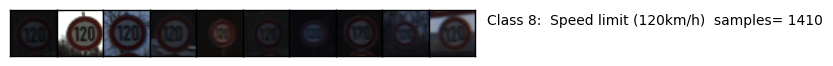

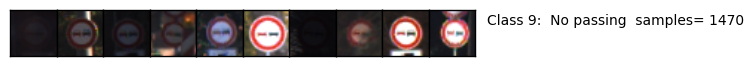

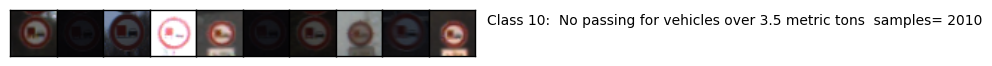

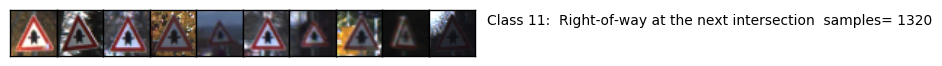

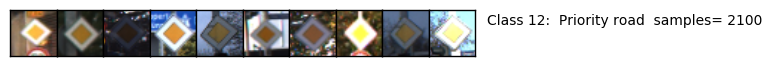

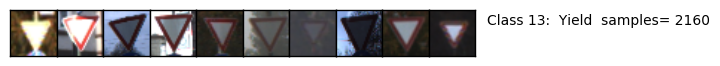

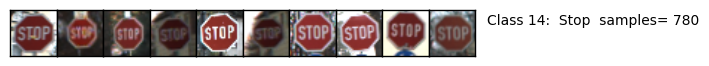

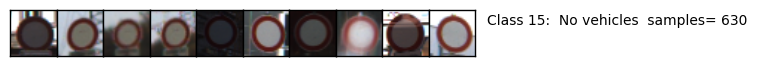

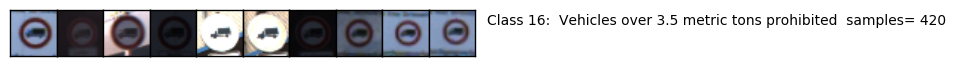

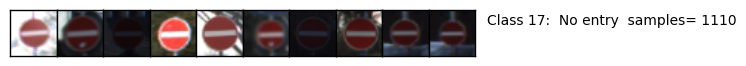

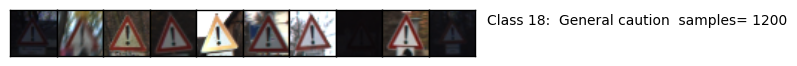

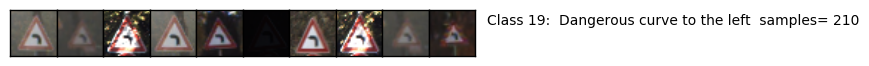

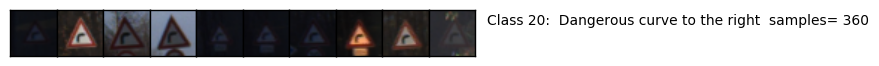

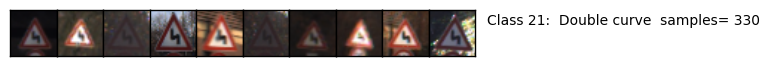

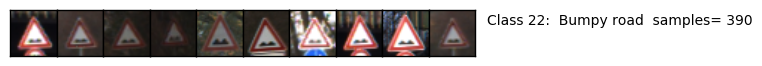

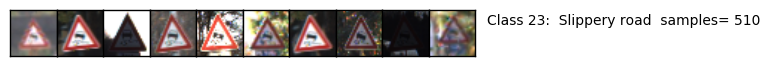

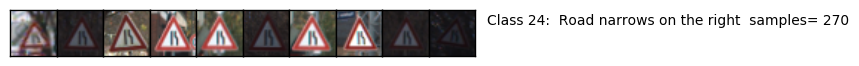

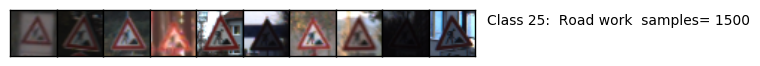

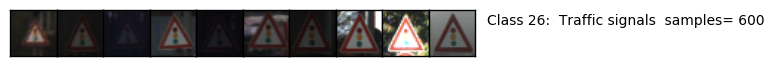

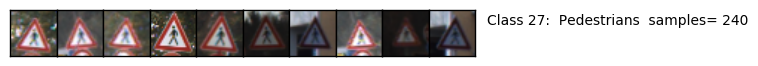

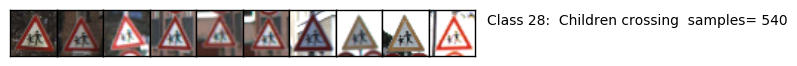

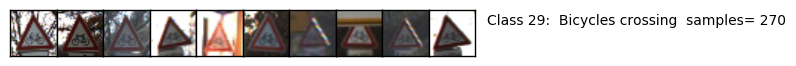

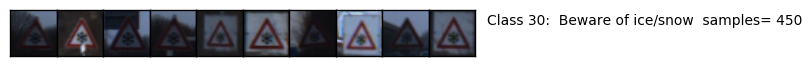

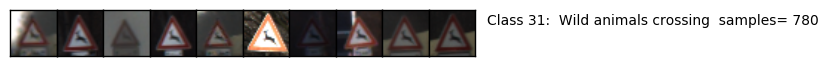

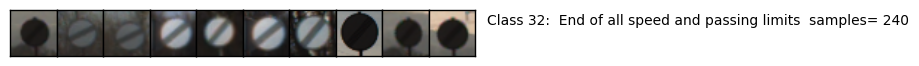

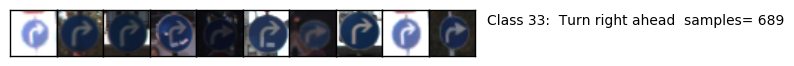

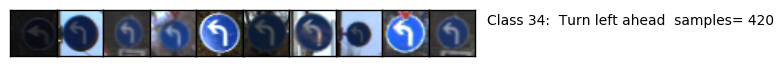

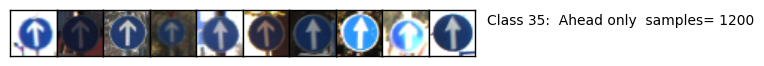

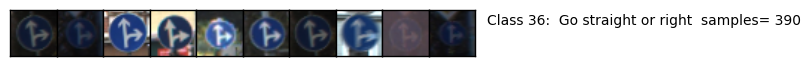

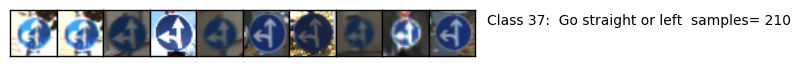

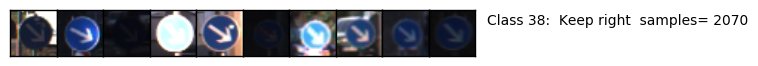

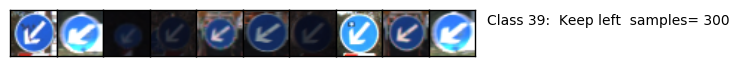

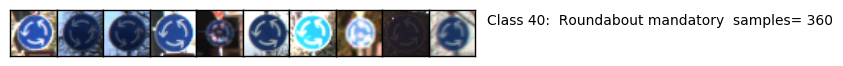

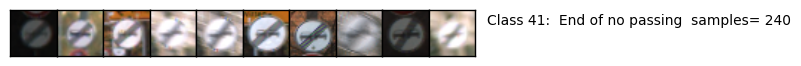

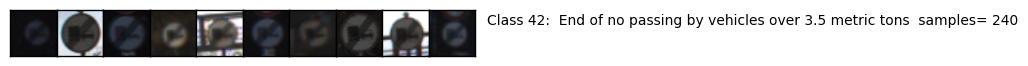

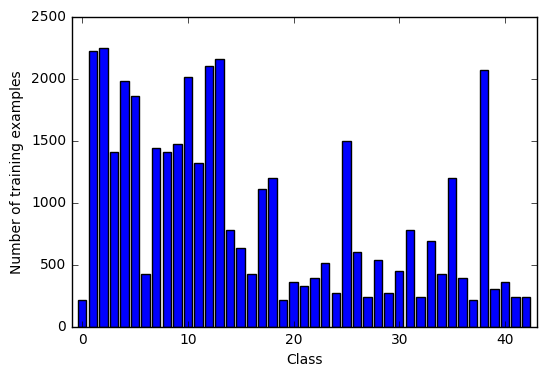

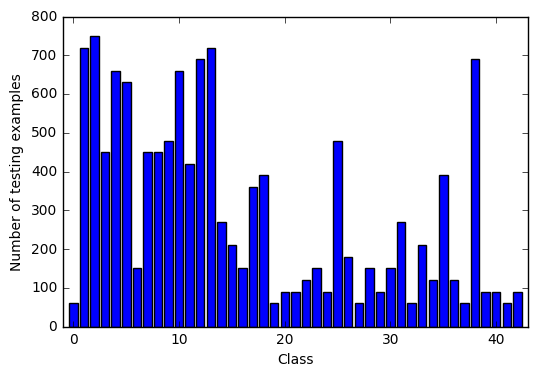

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

# Visualizations will be shown in the notebook.
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from pandas.io.parsers import read_csv

### below code modified from a post I found while searching how to plot this stuff, I made this more 
### general than the original code that relied on the data set being in a fixed order.
### This will work even if the classes are random in the y_train set since it finds 
### all locations of all the unique classes in the data set, not needed here but will likely
### be useful as a general plot function or other use later 
### 
# use np.unique combined with some other cool numpy features to get the indices of all 
# unique occurences of the  labels. 
# found here: http://stackoverflow.com/questions/27411142/how-to-get-lists-of-indices-to-unique-values-efficiently
# Below code will only work if y_train is single dimension. If not, use option return_inverse=True
# to flatten the array and use the flattened returned array to access elements
# I gave up trying to figure out how to get rid of the space between rows after spending 
# nearly a  day on it. Very frustrating as there is likely  free code somewhere that does
# this but could not find it. 
unq_y, unq_counts = np.unique(y_train, return_counts = True)
class_indx = np.split(np.argsort(y_train), np.cumsum(unq_counts[:-1]))  # list of arrays with indices to classes

sign_names = read_csv("signnames.csv").values[:, 1]

for c in unq_y:
    row_str= 'Class ' + str(c) + ':' + '  ' + sign_names[c] + '  ' + 'samples= ' + str(unq_counts[c])
    fig = plt.figure(figsize = (6, 6))
    random_indices = random.sample(set(class_indx[c]), 10)  # get 10 random samples from each class
    for i in range(10):
        axis = fig.add_subplot(6, 10, i + 1, xticks=[], yticks=[])
        axis.imshow(X_train[random_indices[i]])
    plt.text(40,10,row_str)
    fig.subplots_adjust(hspace=0,wspace=0)
    plt.show();    # semicolon will supress printing of text with every plt.x command

plt.bar( np.arange(len(unq_y)), unq_counts, align='center' )
plt.xlabel('Class')
plt.ylabel('Number of training examples')
plt.xlim([-1, len(unq_y)])
plt.show();
## plot distribution of test data for comparison
unq_y, unq_counts = np.unique(y_test, return_counts = True)
plt.bar( np.arange(len(unq_y)), unq_counts, align='center' )
plt.xlabel('Class')
plt.ylabel('Number of testing examples')
plt.xlim([-1, len(unq_y)])
plt.show();

** DATA EXPLORATION PART 2 ** 
Decided to dig deeper into a specific class (27-Pedestrians) since my Test results were poor in this class. I also tried to improve results by data augmenting just this class (see next section). The data augmentation I performed was based on rotating training images to produce more data. This did not help. I believe the results below explain why. The test data set is extremely biased. It looks like it was generated from only a handful of original images and then used data augmentation to generate variations of the same images. This seems like very poor practice for a competition data set? Almost all of the test images are skewed in the same direction. So if we augment with enough variations, we likely could improve results. There is no substitute for visual inspection of data. This makes me very leary of future data sets. Also implies that the only way to improve results on this data set is by lots of data augmentation. I am out of time now, so that will have to wait for another project. 

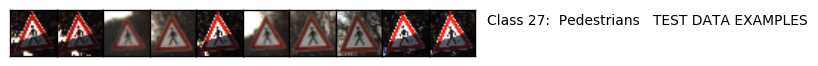

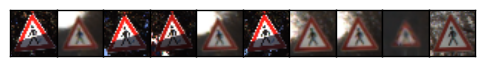

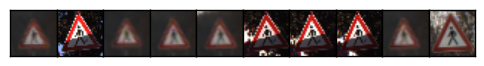

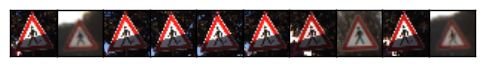

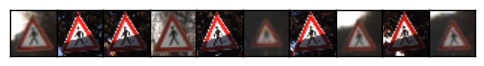

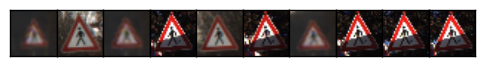

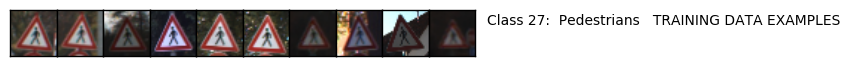

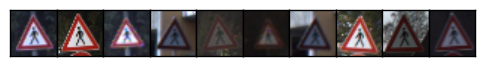

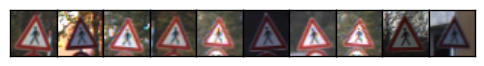

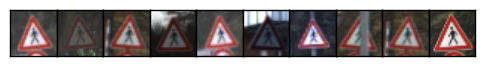

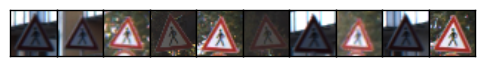

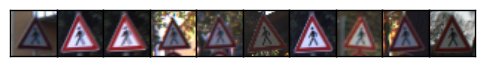

In [4]:
### More data exploration
###  Below was a deep dive on a single class that did not generalize well.

# Visualizations will be shown in the notebook.
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from pandas.io.parsers import read_csv

###  Look at Test set first, only 60 examples so show all of them
unq_y, unq_counts = np.unique(y_test, return_counts = True)
class_indx = np.split(np.argsort(y_test), np.cumsum(unq_counts[:-1]))  # list of arrays with indices to classes

sign_names = read_csv("signnames.csv").values[:, 1]

c=27
row_str= 'Class ' + str(c) + ':' + '  ' + sign_names[c] + '   TEST DATA EXAMPLES'
random_indices = class_indx[c]
im = 0

for k in range(6):
    fig = plt.figure(figsize = (6, 6))
    for i in range(10):
        axis = fig.add_subplot(6, 10, i + 1, xticks=[], yticks=[])
        axis.imshow(X_test[random_indices[im]])
        im+=1
    if im == 10:
        plt.text(40,10,row_str)
    fig.subplots_adjust(hspace=0,wspace=0)
    plt.show();    # semicolon will supress printing of text with every plt.x command
plt.show();

### Now look at 60 training examples 
unq_y, unq_counts = np.unique(y_train, return_counts = True)
class_indx = np.split(np.argsort(y_train), np.cumsum(unq_counts[:-1]))  # list of arrays with indices to classes

sign_names = read_csv("signnames.csv").values[:, 1]


row_str= 'Class ' + str(c) + ':' + '  ' + sign_names[c] + '   TRAINING DATA EXAMPLES'
random_indices = random.sample(set(class_indx[c]), 60)  # get 60 random samples from this class
im = 0

for k in range(6):
    fig = plt.figure(figsize = (6, 6))
    for i in range(10):
        axis = fig.add_subplot(6, 10, i + 1, xticks=[], yticks=[])
        axis.imshow(X_train[random_indices[im]])
        im+=1
    if im == 10:
        plt.text(40,10,row_str)
    fig.subplots_adjust(hspace=0,wspace=0)
    plt.show();    # semicolon will supress printing of text with every plt.x command
plt.show();


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

** DATA AUGMENTATION ** 
Will experiment here with some limited data augmentation. Running low on time so am going to just try to augment a single class that has low  representation to see if it impacts results or not. Any data augmentation of this data set requires some care because some signs if flipped or rotated mean something different. The recommended way to do augmentation is to have it always on so you are always training on a 'new' set of data. I am  simply going to try to increase the Pedestrian  class case since it had poor test results and also was a fail  case in my own image set. This simple data augmentation did not improve results. See previous section for discussion of why.  

In [5]:
### Data augmentation using sklearn rotate
### if this cell is not ran, then no data augmentation will occur. 
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
from pandas.io.parsers import read_csv
from skimage.transform import rotate


unq_y, unq_counts = np.unique(y_train, return_counts = True)
class_indx = np.split(np.argsort(y_train), np.cumsum(unq_counts[:-1]))  # list of arrays with indices to classes
tmp_arrayX=[]
tmp_arrayY=[]
for i in range(800):
    random_indx = random.sample(set(class_indx[27]), 2)  # get index to desired class image randomly
    random_angle = np.random.uniform(-15.0,15.0)  # rotate between -15 and + 15 degrees
    add_image = rotate(X_train[random_indx[0]],random_angle,preserve_range=True)  # returns float(0,1) if False
    add_image = add_image.astype(np.uint8)  # rotate() returns float, cast back to uint8
    tmp_arrayX.append(add_image)
    tmp_arrayY.append(27)

np_X=np.asarray(tmp_arrayX,dtype=np.uint8)             
np_Y=np.asarray(tmp_arrayY,dtype=np.uint8)

X_train = np.append(X_train,np_X,axis=0)
y_train = np.append(y_train,np_Y,axis=0)


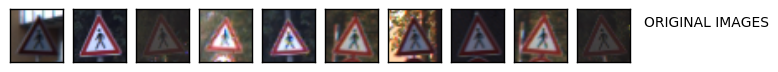

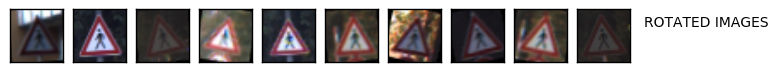

In [9]:
### Visualize the rotations  
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
from pandas.io.parsers import read_csv
from skimage.transform import rotate

random_indx = random.sample(set(class_indx[27]), 10)  # grab 10 random images from training set of class 27 
tmp_arrayR = []
fig = plt.figure(figsize = (8, 8))
for i in range(10):
    random_angle = np.random.uniform(-15.0,15.0)
    add_image = rotate(X_train[random_indx[i]],random_angle,preserve_range=True)  # returns float(0,1) if False
    add_image = add_image.astype(np.uint8)  # rotate() returns float, cast back to uint8
    tmp_arrayR.append(add_image)
    axis = fig.add_subplot(6, 10, i + 1, xticks=[], yticks=[])
    axis.imshow(X_train[random_indx[i]])
plt.text(40,10,'ORIGINAL IMAGES')    
fig = plt.figure(figsize = (8, 8))
for i in range(10):
    axis = fig.add_subplot(6, 10, i + 1, xticks=[], yticks=[])
    axis.imshow(tmp_arrayR[i])
plt.text(40,10,'ROTATED IMAGES') 
plt.show();    


LeCun paper showed grayscale worked best so going to use that info as starting point. Here is a stack exchange link on converting RGB to grayscale: http://stackoverflow.com/questions/687261/converting-rgb-to-grayscale-intensity that gives coefficients commonly used and some supporting wiki document at https://en.wikipedia.org/wiki/Luma_(video). Common practice is to use Y′ = 0.299 R′ + 0.587 G′ + 0.114 B′  where the prime denotes previous scaling of pixel values to be between 0 and 1. (Gamma compression). 

In [10]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
###
### LeCun paper showed grayscale worked best so going to use that info as starting point. Here is stack exchange
### link on converting RGB to grayscale:
###  http://stackoverflow.com/questions/687261/converting-rgb-to-grayscale-intensity
### formula is Y′ = 0.299 R′ + 0.587 G′ + 0.114 B′  Where the prime denotes previous scaling of pixel 
### values to be between 0 and 1. 

import numpy as np

def rgb_grayscale_normalize(X,mean=None):
    """
    Normalize the rgb image data with Min-Max scaling to a range of [0, 1] and     
    convert to grayscale
    :param X: The image data in RGB to be normalized X.shape = (n,height,width,channels)
    :param mean: if mean is not None, zero mean the data before return
    :return: Normalized image data converted to grayscale
    """
    X = (X / 255.).astype(np.float32)  # scale to [0,1], cast to float32 else would be float64
    X = 0.299 * X[:, :, :, 0] + 0.587 * X[:, :, :, 1] + 0.114 * X[:, :, :, 2]
    if mean != None:
        X -= np.mean(X)
    X = X.reshape(X.shape + (1,))  # need this or else shape would be (n,32,32) and want (n,32,32,1)
    return X


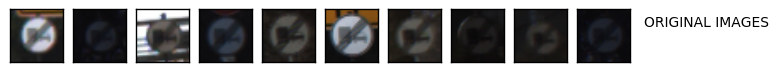

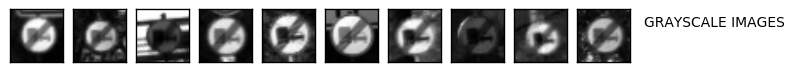

In [13]:
### Visualize grayscale here
### 
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
import random

 
random_indx = random.sample(set(class_indx[42]), 10)  # grab 10 random images from training set of class 42
X_gray = rgb_grayscale_normalize(X_train[random_indx],mean=1)
fig = plt.figure(figsize = (8, 8))
for i in range(10):
    axis = fig.add_subplot(6, 10, i + 1, xticks=[], yticks=[])
    axis.imshow(X_train[random_indx[i]])
plt.text(40,10,'ORIGINAL IMAGES') 

fig = plt.figure(figsize = (8, 8))
for i in range(10):
    axis = fig.add_subplot(6, 10, i + 1, xticks=[], yticks=[])
    axis.imshow(X_gray[i].squeeze(),cmap='gray')
plt.text(40,10,'GRAYSCALE IMAGES') 
plt.show();



In [14]:
### Convert all data to grayscale
X_train = rgb_grayscale_normalize(X_train,mean=1) 
X_test  = rgb_grayscale_normalize(X_test,mean=1)

In [ ]:
### Experiment with rescaling intensity of images, thought was that this might improve 
### over grayscale, but it actually made the validation accuracy worse. There might be settings 
### here that could improve it, but out of time to continue on this. Comment out for now. 
'''
import numpy as np
from skimage import exposure

for i in range(len(X_train)):
    image = X_train[i]
    p1, p9 = np.percentile(image, (1, 90))
    image = exposure.rescale_intensity(image.squeeze(), in_range=(p1, p9))
    X_train[i]=np.reshape(image,(32,32,1))
for i in range(len(X_test)):
    image = X_test[i]
    p1, p9 = np.percentile(image, (1, 90))
    image = exposure.rescale_intensity(image.squeeze(), in_range=(p1, p9))
    X_test[i]=np.reshape(image,(32,32,1))    
'''    

### Split Data into Training, Validation and Testing Sets

Added plots to make sure the distribution of classes after splitting was similar to starting distribution. This sanity check showed that the split keeps the original distributions as it should. 

X_train shape =  (32007, 32, 32, 1) y_train shape =  (32007,)
X_test shape =  (12630, 32, 32, 1) y_test shape =  (12630,)
X_validation shape =  (8002, 32, 32, 1) y_validation shape =  (8002,)


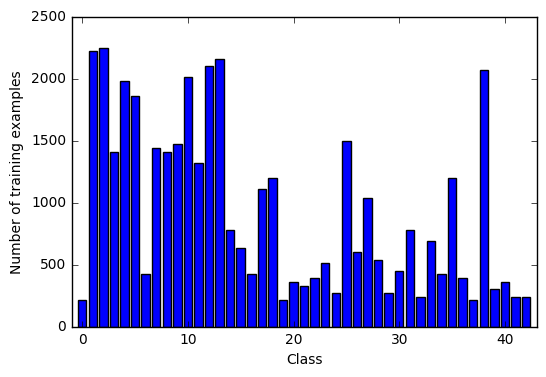

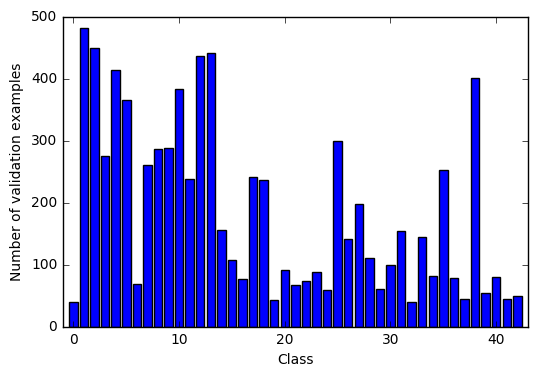

In [15]:
### Split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import matplotlib

#X_train, y_train = shuffle(X_train, y_train)
unq_y, unq_counts = np.unique(y_train, return_counts = True)  ## save stats on original y_train

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2,random_state=42)
print('X_train shape = ',X_train.shape, 'y_train shape = ',y_train.shape)
print('X_test shape = ',X_test.shape, 'y_test shape = ',y_test.shape)
print('X_validation shape = ',X_validation.shape,'y_validation shape = ',y_validation.shape)
image = X_train[0].squeeze()
#image = X_train[0]

###  Test case of much less training data to see if we overfit, if not suspect that need more parameters
#X_train = X_train[1:500,:,:,:]
#y_train = y_train[1:500]
#print('reduced X_train shape = ',X_train.shape)
#print('reduced y_train shape = ', y_train.shape)

## sanity check: compare original distribution to test split of validation, should be close


plt.bar( np.arange(len(unq_y)), unq_counts, align='center' )
plt.xlabel('Class')
plt.ylabel('Number of training examples')
plt.xlim([-1, len(unq_y)])
plt.show();
## plot distribution of validation data for comparison
unq_y, unq_counts = np.unique(y_validation, return_counts = True)
plt.bar( np.arange(len(unq_y)), unq_counts, align='center' )
plt.xlabel('Class')
plt.ylabel('Number of validation examples')
plt.xlim([-1, len(unq_y)])
plt.show();

### Model Architecture

In [16]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf
from tensorflow.contrib.layers import flatten
EPOCHS = 20
BATCH_SIZE = 128

def MyNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer C1: Convolutional. Input = 32x32x1. Output = 28x28x32.
    #keep_prob = tf.placeholder(tf.float32) # probability to keep units
    wc1 = tf.Variable(tf.truncated_normal(shape=(5,5,1,32),mean=mu,stddev=sigma))   # not sure what declaring variable inside def does
    bc1 = tf.Variable(tf.zeros(32))
    outc1 = tf.nn.conv2d(x,wc1,strides=[1,1,1,1],padding='VALID') + bc1

    # TODO: Activation.  
    outc1 = tf.nn.relu(outc1)
    # Add Dropout layer
    #outc1 = tf.nn.dropout(outc1, keep_prob)
    
    # Layer S1 Pooling 
    # Input = 28x28x32. Output = 14x14x32.
    # here we will use max pooling
    outc1 = tf.nn.max_pool(outc1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    

    # TODO: Layer C2: Convolutional. Output = 10x10x64. Input = 14x14x32
    wc2 = tf.Variable(tf.truncated_normal(shape=(5,5,32,64),mean=mu,stddev=sigma)) 
    bc2 = tf.Variable(tf.zeros(64))
    outc2 = tf.nn.conv2d(outc1,wc2,strides=[1,1,1,1],padding='VALID') + bc2    
    
    # TODO: Activation.
    outc2 = tf.nn.relu(outc2)
    
    # Add Dropout Layer
    #outc2 = tf.nn.dropout(outc2, keep_prob)

    # TODO: Layer S2: Pooling. Input = 10x10x64. Output = 5x5x64.
    # here we will use max pooling
    outc2 = tf.nn.max_pool(outc2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    '''
    ### Add 3rd convolutional layer Input = 5x5x64.  Output = 
    wc2a = tf.Variable(tf.truncated_normal(shape=(5,5,64,128),mean=mu,stddev=sigma)) 
    bc2a = tf.Variable(tf.zeros(16))
    outc2a = tf.nn.conv2d(outc1,wc2,strides=[1,1,1,1],padding='VALID') + bc2a    
    
    # TODO: Activation.
    outc2a = tf.nn.relu(outc2a)
    
    # Add Dropout Layer
    #outc2 = tf.nn.dropout(outc2, keep_prob)

    # TODO: Layer S2: Pooling. Input = 10x10x16. Output = 5x5x16.
    # here we will use max pooling
    outc2a = tf.nn.max_pool(outc2a, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')
    '''    
    
    # TODO: Flatten. Input = 5x5x64. Output = 1600.
    flat = flatten(outc2)
    
    # TODO: Layer 3: Fully Connected. Input = 1600. Output = 1024.
    wc3 = tf.Variable(tf.truncated_normal(shape=(1600,1024),mean=mu,stddev=sigma))   
    bc3 = tf.Variable(tf.zeros(1024))  
    f3 = tf.matmul(flat,wc3) + bc3
    
    # TODO: Activation.
    f3 = tf.nn.relu(f3)

    # TODO: Layer 4: Fully Connected. Input = 1024. Output = 43.
    wc4 = tf.Variable(tf.truncated_normal(shape=(1024,43),mean=mu,stddev=sigma))   
    bc4 = tf.Variable(tf.zeros(43))  
    logits = tf.matmul(f3,wc4) + bc4    
    '''   
    # TODO: Activation.
    f4 = tf.nn.relu(f4)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.

    wc5 = tf.Variable(tf.truncated_normal(shape=(84,43),mean=mu,stddev=sigma))   
    bc5 = tf.Variable(tf.zeros(43))  
    logits = tf.matmul(f4,wc5) + bc5     
    '''    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [ ]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

**Features and Labels**


x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.



In [17]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32) # probability to keep units

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.


In [18]:
rate = 0.001

logits = MyNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.


In [19]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))  # returns tensor of dtype = boolean
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))  # convert from boolean to float32
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y,keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples
print(X_train.shape)

(32007, 32, 32, 1)


## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [20]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            #sess.run(training_operation, feed_dict={x: batch_x, y: batch_y,keep_prob: 1.0})
            _, loss = sess.run([training_operation,loss_operation], feed_dict={x: batch_x, y: batch_y,keep_prob: 1.0})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        training_accuracy = evaluate(X_train,y_train)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print('Training Loss = ',loss)
        print('Training Accuracy = ',training_accuracy)
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.949
Training Loss =  0.00237336
Training Accuracy =  0.961352204205

EPOCH 2 ...
Validation Accuracy = 0.968
Training Loss =  0.0962863
Training Accuracy =  0.975724060362

EPOCH 3 ...
Validation Accuracy = 0.979
Training Loss =  0.00655899
Training Accuracy =  0.988502515075

EPOCH 4 ...
Validation Accuracy = 0.983
Training Loss =  0.00249961
Training Accuracy =  0.992876558253

EPOCH 5 ...
Validation Accuracy = 0.987
Training Loss =  0.0398791
Training Accuracy =  0.997063142438

EPOCH 6 ...
Validation Accuracy = 0.986
Training Loss =  0.0236667
Training Accuracy =  0.995438497829

EPOCH 7 ...
Validation Accuracy = 0.992
Training Loss =  0.000163002
Training Accuracy =  0.99943762302

EPOCH 8 ...
Validation Accuracy = 0.988
Training Loss =  0.00844751
Training Accuracy =  0.996969412941

EPOCH 9 ...
Validation Accuracy = 0.992
Training Loss =  0.000679128
Training Accuracy =  0.998500328053

EPOCH 10 ...
Validation Accuracy = 0.986
Tra

'./lenet'

Model saved


Evaluate the Model

Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.


In [21]:

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.954


** Evaluate Test results **

In [22]:
## test cell to evaluate test results

def evaluateZ(X_data, y_data,dict_class):
    num_examples = len(X_data)
    #num_examples = 1
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        decisions_op = tf.argmax(logits,1)        
        correct_labels_op = tf.argmax(one_hot_y,1)
        decisions = sess.run(decisions_op,feed_dict={x: batch_x,keep_prob: 1.0})
        correct_labels = sess.run(correct_labels_op,feed_dict={y: batch_y})
        correct_locations = sess.run(tf.equal(decisions,correct_labels))
        for i in range(len(decisions)):
            dict_class[correct_labels[i]][1] += 1   # increment class count
            if correct_locations[i] == True:
                dict_class[decisions[i]][0] += 1      #  incrementj correct decision count
    return dict_class

dict_class = {c_key: [0,0] for c_key in range(43)}

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    dict_class = evaluateZ(X_test, y_test,dict_class)
    tmpsum = 0
    ysum = 0
    for key in dict_class:
        print('count of class: ',key,' = ',dict_class[key])
        tmpsum += dict_class[key][0]
        ysum += dict_class[key][1]
    print(tmpsum/ysum)
    




count of class:  0  =  [52, 60]
count of class:  1  =  [713, 720]
count of class:  2  =  [736, 750]
count of class:  3  =  [438, 450]
count of class:  4  =  [628, 660]
count of class:  5  =  [603, 630]
count of class:  6  =  [123, 150]
count of class:  7  =  [425, 450]
count of class:  8  =  [444, 450]
count of class:  9  =  [473, 480]
count of class:  10  =  [645, 660]
count of class:  11  =  [408, 420]
count of class:  12  =  [676, 690]
count of class:  13  =  [714, 720]
count of class:  14  =  [254, 270]
count of class:  15  =  [209, 210]
count of class:  16  =  [149, 150]
count of class:  17  =  [348, 360]
count of class:  18  =  [322, 390]
count of class:  19  =  [60, 60]
count of class:  20  =  [89, 90]
count of class:  21  =  [71, 90]
count of class:  22  =  [110, 120]
count of class:  23  =  [138, 150]
count of class:  24  =  [77, 90]
count of class:  25  =  [453, 480]
count of class:  26  =  [150, 180]
count of class:  27  =  [30, 60]
count of class:  28  =  [144, 150]
count o

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

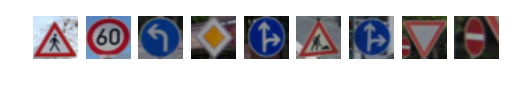

In [23]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import numpy as np
from skimage import io
from scipy.misc import imresize
import os
### Get filenames of images from directory , files are cropxxx_nn.jpeg where nn is class label
filepath='/home/ai/CarND-Traffic-Sign-Classifier-Project/examples/'
filenames=[]
for file in os.listdir(filepath):
    if file.startswith('crop'):
        filenames.append(file)
        
my_imgs = np.uint8(np.zeros((9,32,32,3)))

my_labels=[]
for i in range(len(filenames)):
    file = filenames[i]
    image = io.imread(filepath + file)
    my_imgs[i] = imresize(image,(32,32,3))    # resize image, default uses bilinear transform
    my_labels.append(int(file.split('_')[1].split('.')[0]))    ## filename has class label value after underscore

f,axarr = plt.subplots(1,9)
for i in range(len(filenames)):
    axarr[i].imshow(my_imgs[i])
    axarr[i].axis('off')

plt.show();



### Predict the Sign Type for Each Image

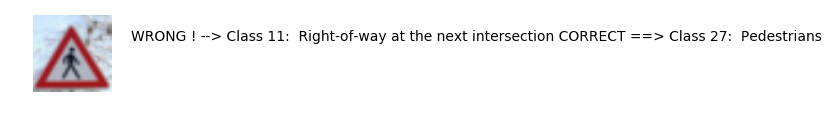

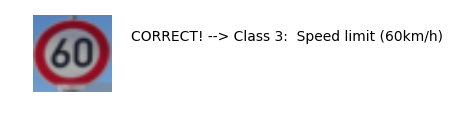

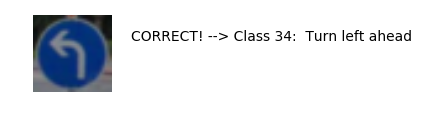

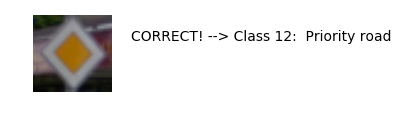

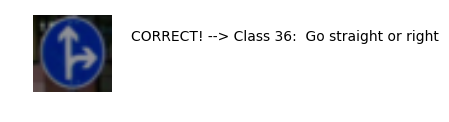

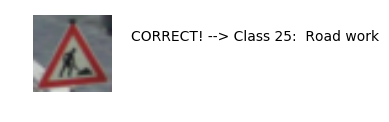

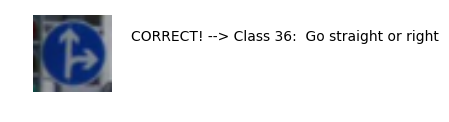

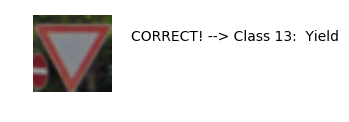

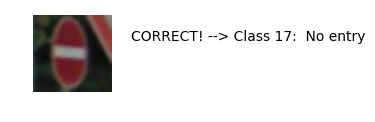

In [24]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
#x = tf.placeholder(tf.float32, (None, 32, 32, 1))
#y = tf.placeholder(tf.int32, (None))
#one_hot_y = tf.one_hot(y, 43)
#keep_prob = tf.placeholder(tf.float32) # probability to keep units
%matplotlib inline
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from pandas.io.parsers import read_csv

sign_names = read_csv("signnames.csv").values[:, 1]
X_my_images = rgb_grayscale_normalize(my_imgs,mean=1)
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    prediction_op=tf.nn.softmax(logits)
    my_predictions = sess.run(prediction_op, feed_dict={x: X_my_images, keep_prob: 1.0})
    my_decisions_op = tf.argmax(my_predictions, 1)
    my_decisions = sess.run(my_decisions_op)        
    my_correct_decisions_op = tf.argmax(one_hot_y, 1)
    my_correct_decisions = sess.run(my_correct_decisions_op,feed_dict={y: my_labels})  ###  sess and .eval() return numpy arrays
    top_k = sess.run(tf.nn.top_k(my_predictions, 5, sorted=True))
    for i in range(len(my_decisions)):
        cd = my_correct_decisions[i]
        md = my_decisions[i]
        str_correct = 'Class ' + str(cd) + ':' + '  ' + sign_names[cd]
        str_decision = 'Class ' + str(md) + ':' + '  ' + sign_names[md]
        if cd == md:
            str_print = 'CORRECT! --> ' + str_decision
        else:
            str_print = 'WRONG ! --> ' + str_decision + ' CORRECT ==> ' + str_correct
        fig = plt.figure(figsize = (1,6))
        plt.imshow(my_imgs[i])
        plt.text(40,10,str_print)
        plt.axis('off')
        plt.show()
plt.show();   ### WOW!  this shuts down the annoying print statements, putting semicolon in line above does not


### Analyze Performance

In [25]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
accuracy = np.sum(my_decisions == my_correct_decisions)/len(my_decisions)
print('Accuracy for 9 images = ',accuracy)

Accuracy for 9 images =  0.888888888889


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

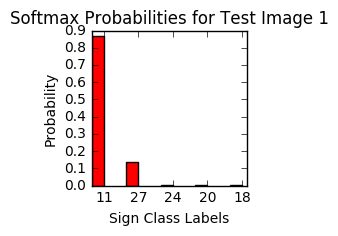

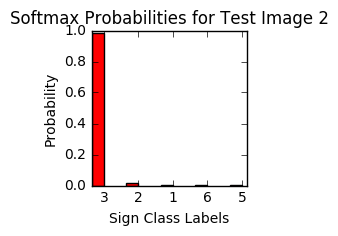

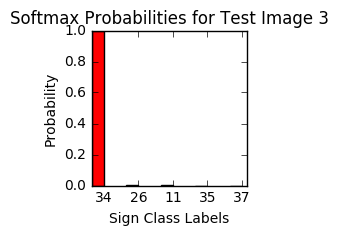

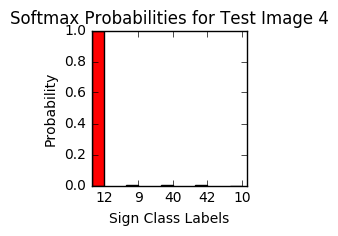

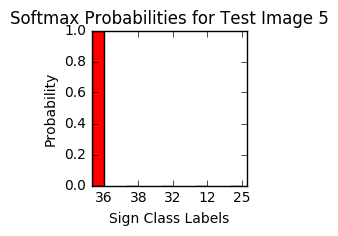

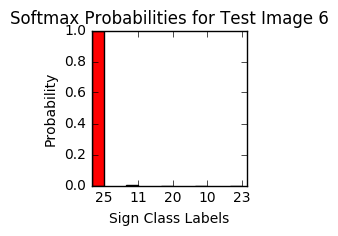

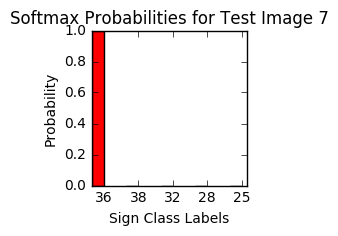

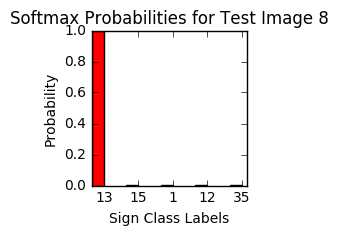

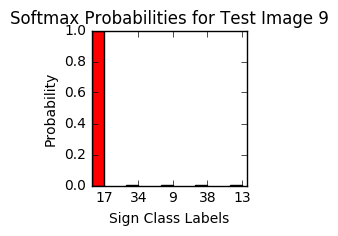

In [26]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
###
###  top_k created in previous cell,  will plot here

ind = np.arange(5)  # the x locations for the values
width = 0.35       # the width of the bars

for i in range(len(my_decisions)):
    fig = plt.figure(figsize = (2,2))
    values = top_k[0][i]                  # tf.nn.top_k returns values [0] and indices [1]
    plt.bar(ind, values, width, color='r')
    plt.ylabel('Probability')
    plt.xlabel('Sign Class Labels')
    plt.title('Softmax Probabilities for Test Image {}'.format(str(i+1)))
    plt.xticks(ind+width, tuple(top_k[1][i]))

plt.show();

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 